# Постановка задачи

В нашем распоряжении данные о разных героях и злодеях из комиксов. Задача исследования – посмотреть, как распределяются их основные характеристики: пол, раса, рост, вес, мировоззрение и другие признаки. Отдельно интересно понять, каких персонажей больше по мировоззрению (good, bad, neutral и «без категории») и есть ли связь между мировоззрением и физическими параметрами, такими как рост и вес.

# Подключаем библиотеки

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [140]:
df = pd.read_excel("1_heroes_information.xlsx")

In [141]:
df.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


# Описание Данных

name - имя персонажа  
Gender - пол  
Eye color - цвет глаз  
Race - раса  
Hair color - цвет волос  
Height - рост  
Publisher - издатель комиксов  
Skin color - цвет кожи  
Alignment - мировоззрение (good/bad/neutral)  
Weight - вес  

# Целевой признак:  
Alignment - мировоззрение (good/bad/neutral)  


In [142]:
df.shape

(734, 11)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,734.0,366.500000,212.031837,0.0,183.25,366.5,549.75,733.0
Height,734.0,102.254087,139.624543,-99.0,-99.00,175.0,185.00,975.0
Weight,732.0,43.855191,130.823733,-99.0,-99.00,62.0,90.00,900.0


In [145]:
df.describe(include="O")

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment
count,734,734,734,734,734,719,734,734
unique,715,3,23,62,30,24,17,4
top,Goliath,Male,blue,-,-,Marvel Comics,-,good
freq,3,505,225,304,172,388,662,496


# Разведочный анализ данных

## Проверка на пропущенные и дублирующиеся записи

In [146]:
df.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

У нас имеется 15 пропущенных записей в столбце Publisher (15)  и в столбце Weight (2)

In [147]:
df.duplicated().sum()

np.int64(0)

Дубликаты не выявлены, все значения уникальны!

In [148]:
df = df.dropna(axis=1, how='all')

Удаляем все пропущенные значения

In [149]:
cols = ["Height", "Weight"]
df[cols] = df[cols].clip(lower=0)

Так как у нас имеются отрицательные значения, мы заменяем их на 0

In [150]:
df.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,0.0,NBC - Heroes,-,good,0.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


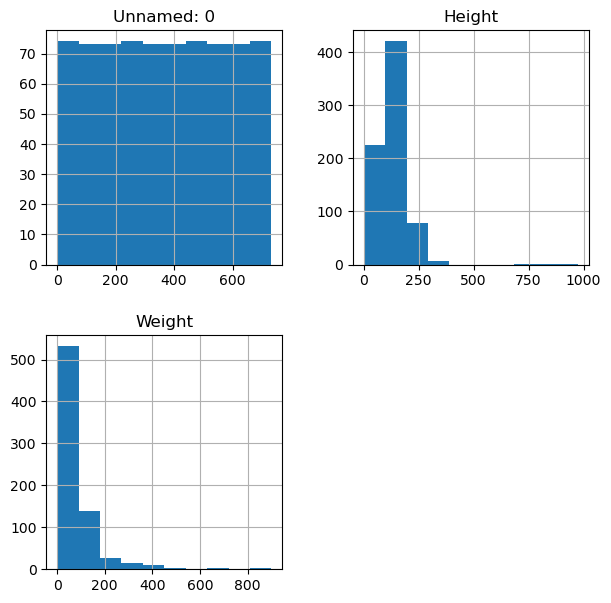

In [151]:
df.hist(figsize=(7, 7));

In [152]:
df["Alignment"].value_counts()

Alignment
good       496
bad        207
neutral     24
-            7
Name: count, dtype: int64

In [153]:
df["Alignment"].value_counts(normalize = True)

Alignment
good       0.675749
bad        0.282016
neutral    0.032698
-          0.009537
Name: proportion, dtype: float64

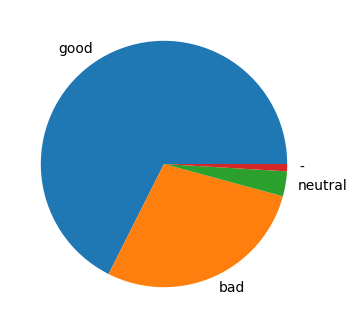

In [154]:
plt.figure(figsize=(4, 4))
plt.pie(df["Alignment"].value_counts(), labels=df["Alignment"].value_counts().index);

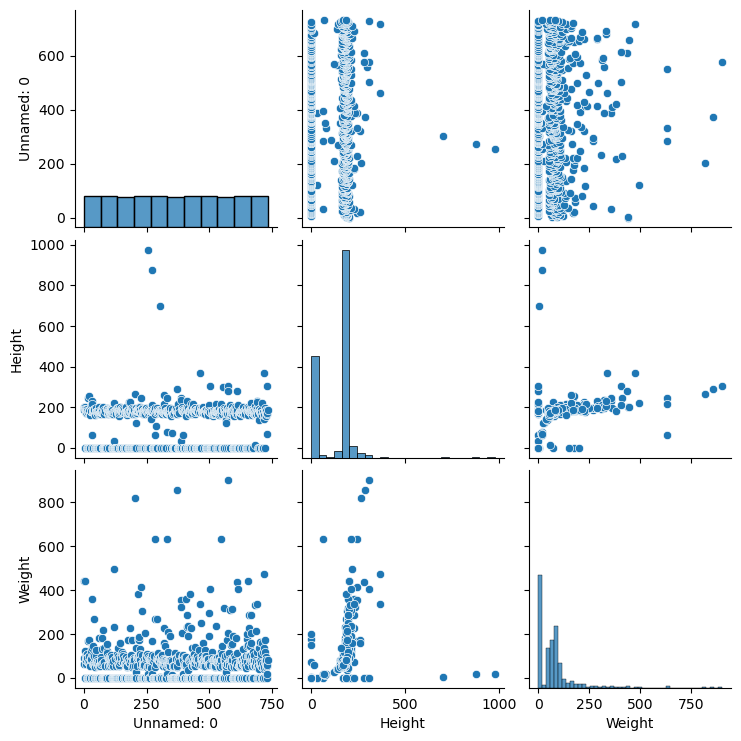

In [155]:
sns.pairplot(data=df);

In [156]:
df.head(10)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,0.0,NBC - Heroes,-,good,0.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [157]:
df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [158]:
df["IdAlignment"] = df["Alignment"].replace({"good": 0, "bad": 1, "neutral": 2})

In [159]:
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

In [160]:
df["Height"] = pd.to_numeric(df["Height"], errors='coerce')

In [166]:
df["Weight"] = pd.to_numeric(df["Weight"], errors='coerce')

In [167]:
df = df.replace("-", np.nan)

C:\Users\Albina\AppData\Local\Temp\ipykernel_3328\2340671193.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("-", np.nan)


In [168]:
print(df[["Height", "Weight", "IdAlignment", "Gender"]].isnull().sum())

Height          0
Weight          2
IdAlignment     7
Gender         29
dtype: int64


In [169]:
df_cl = df.dropna(subset=["Height", "Weight"])

Удаляем пропущенные значения в столбцах

In [170]:
df_corr = df_cl[["Height", "Weight", "Gender",  "IdAlignment"]].corr()
df_corr

,Height,Weight,Gender,IdAlignment
Height,1.000000,0.489591,0.048153,0.057637
Weight,0.489591,1.000000,0.127849,0.185607
Gender,0.048153,0.127849,1.000000,0.158250
IdAlignment,0.057637,0.185607,0.158250,1.000000


<Axes: >

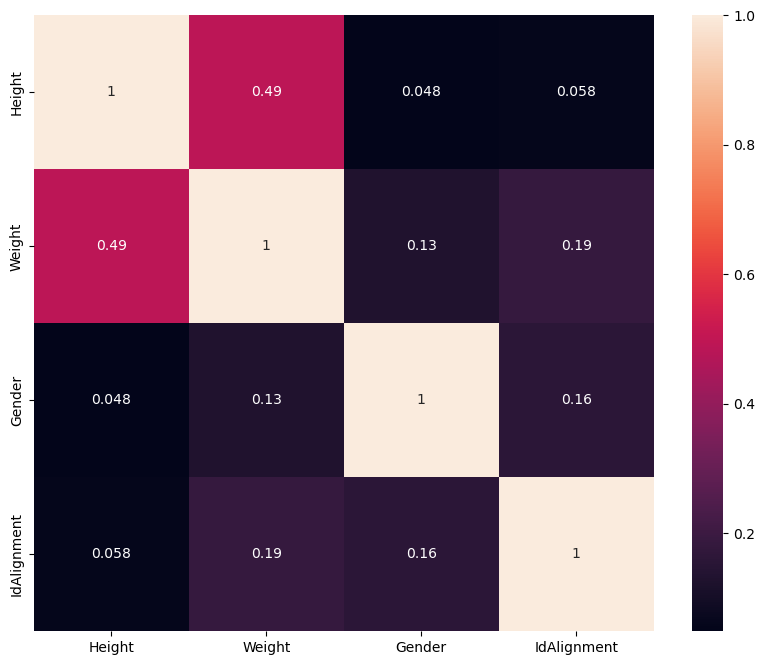

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)

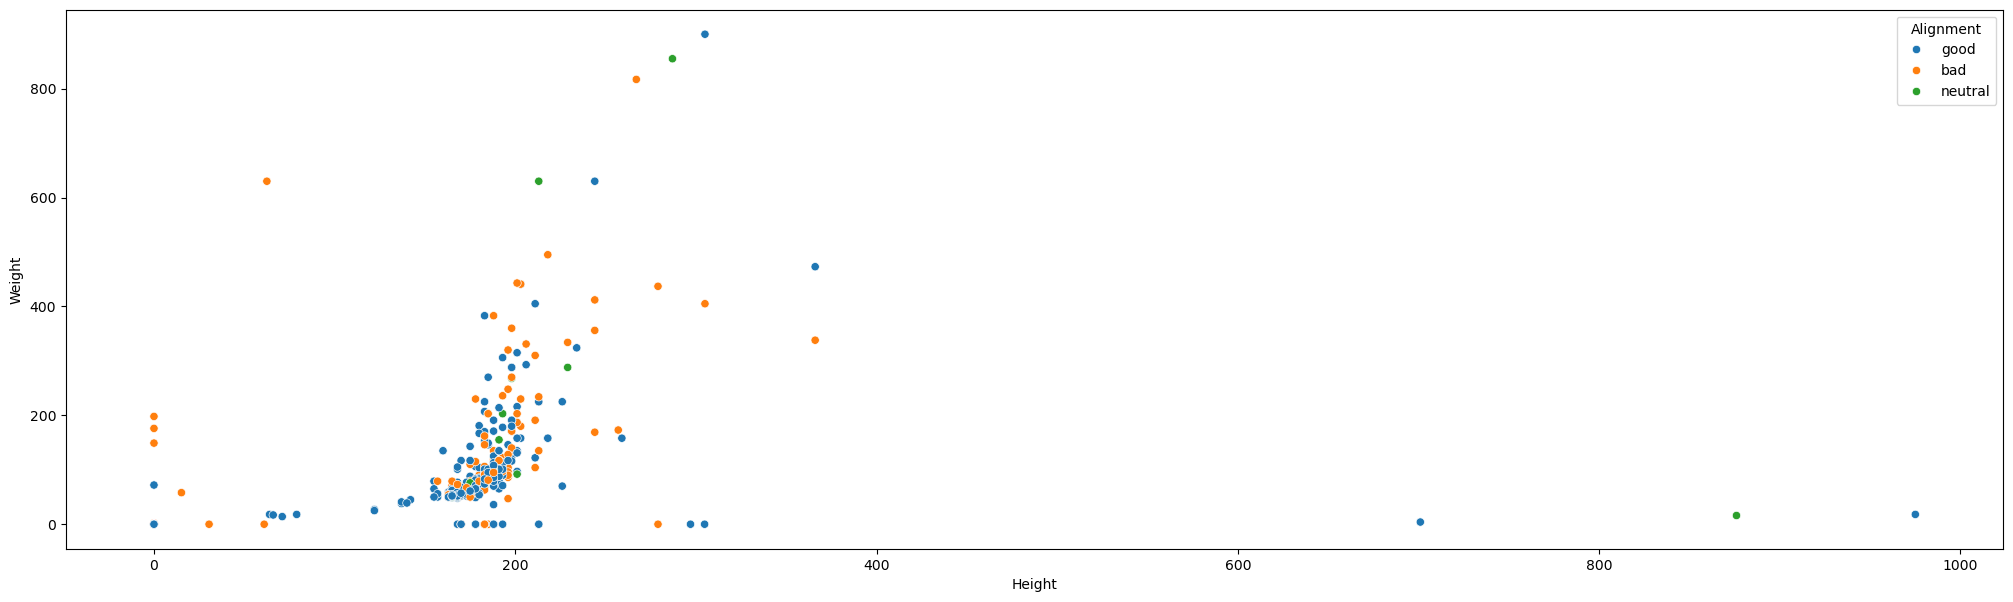

In [32]:
plt.figure(figsize=(25, 7))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Alignment');

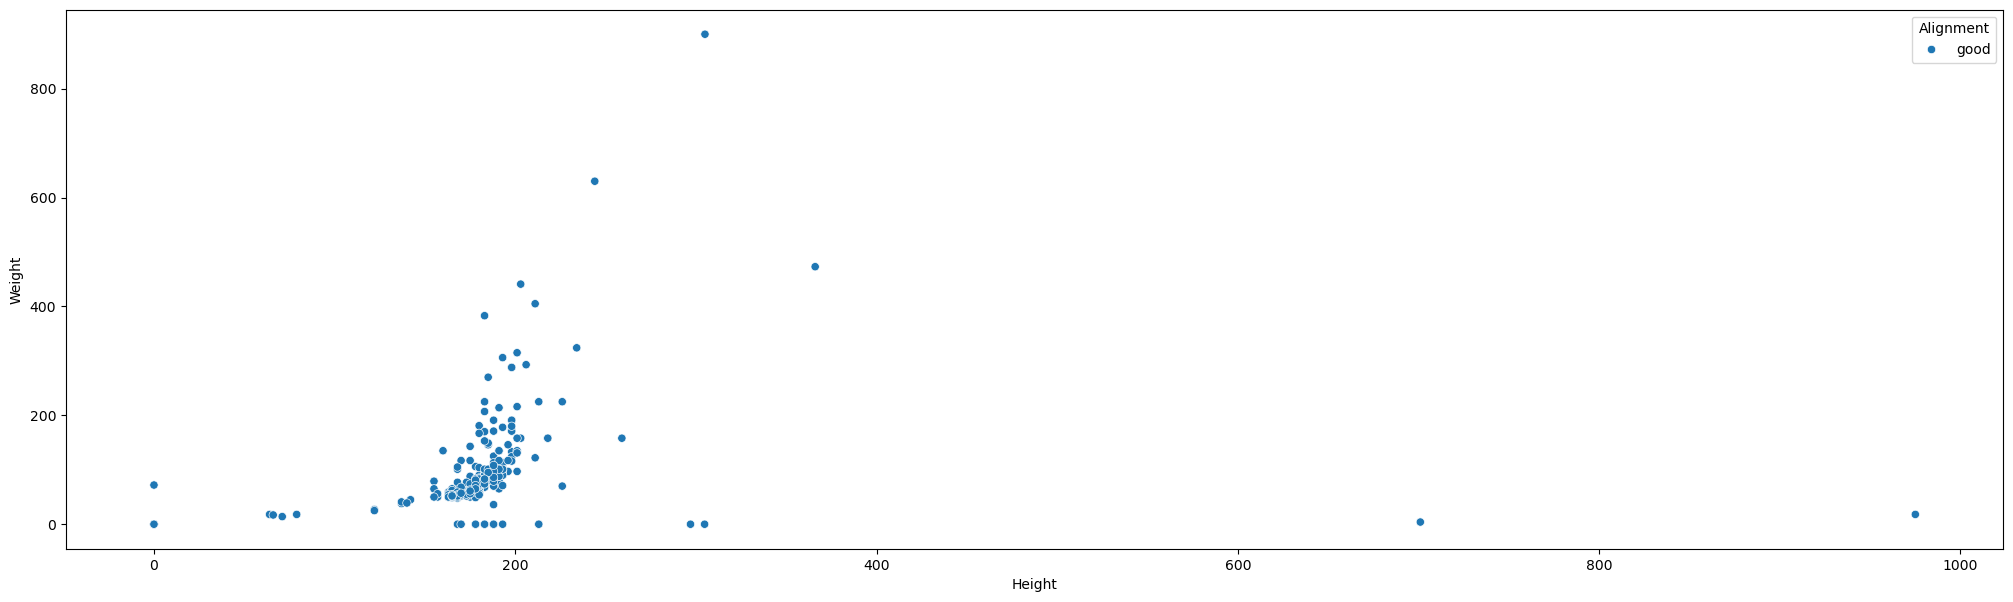

In [33]:
plt.figure(figsize=(25, 7))
sns.scatterplot(data=df[df["Alignment"]=="good"], x="Height", y="Weight", hue="Alignment");

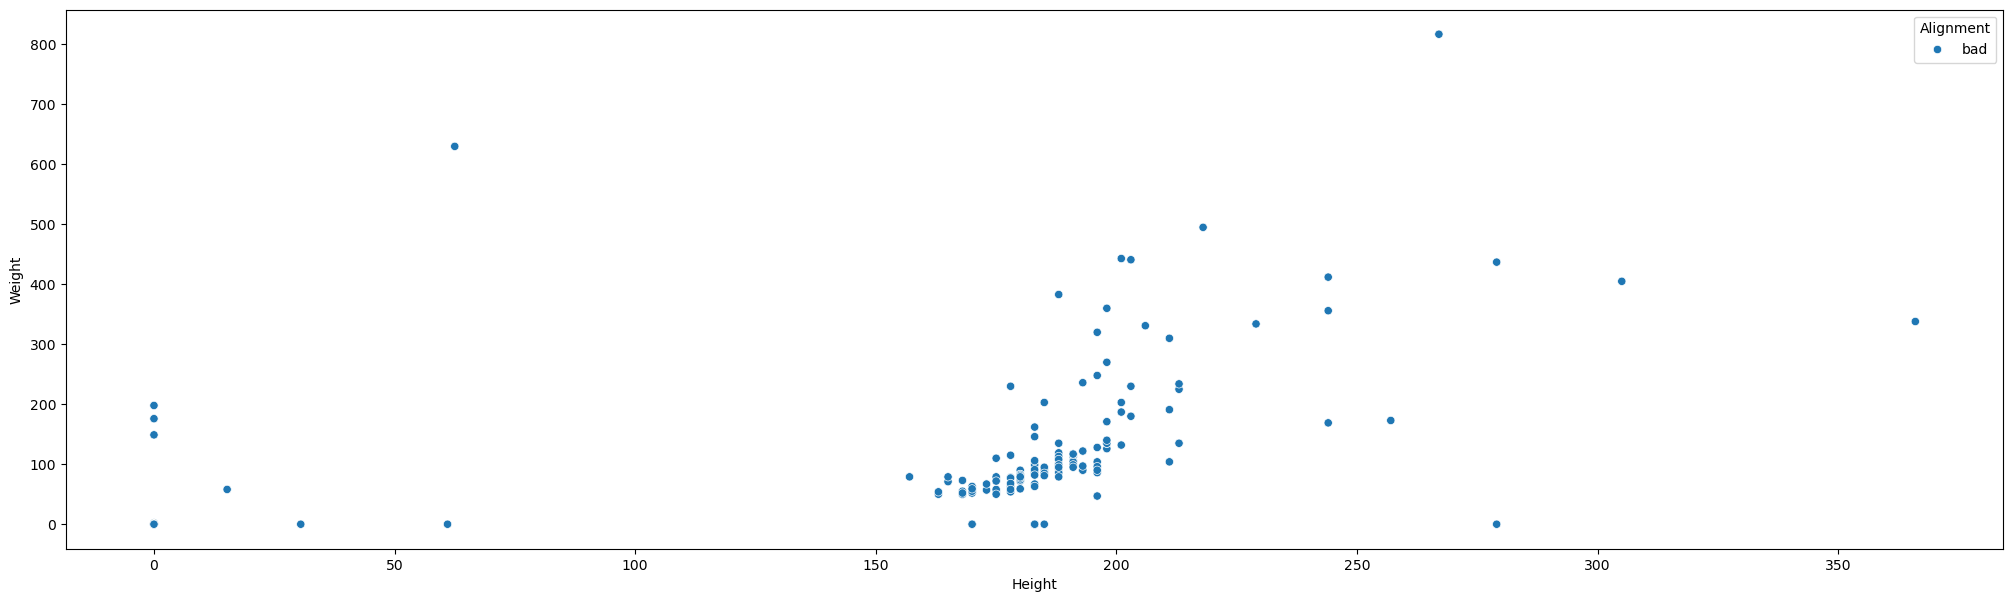

In [34]:
plt.figure(figsize=(25, 7))
sns.scatterplot(data=df[df["Alignment"]=="bad"], x="Height", y="Weight", hue="Alignment");

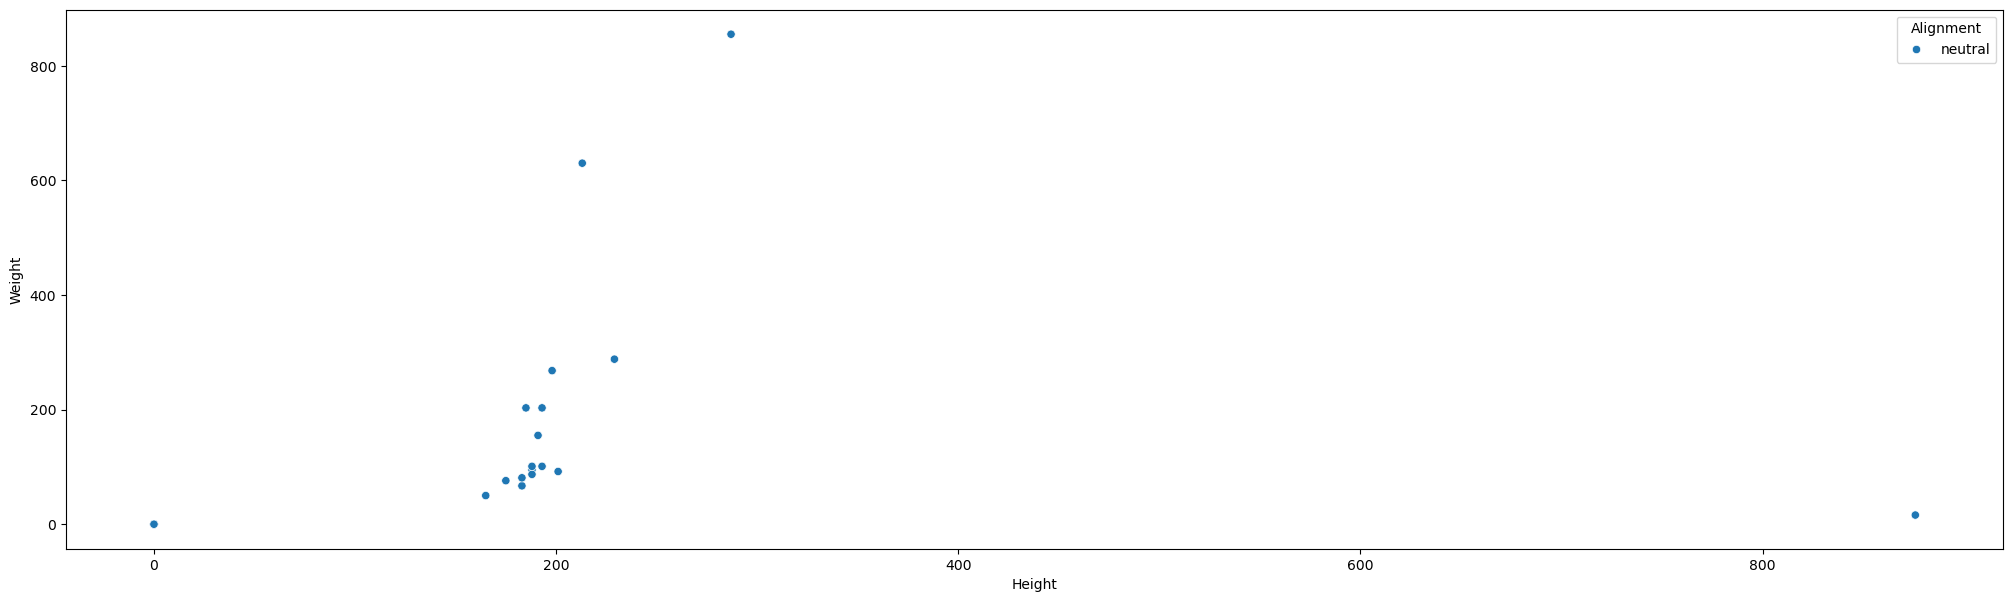

In [35]:
plt.figure(figsize=(25, 7))
sns.scatterplot(data=df[df["Alignment"]=="neutral"], x="Height", y="Weight", hue="Alignment");

# Выводы по результатам исследования

- В датасете содержится 734 персонажа и 10 признаков; присутствуют как числовые (рост, вес), так и категориальные признаки (пол, раса, издатель, мировоззрение и др.).   Пропуски обнаружены в столбцах Publisher и Weight, дубликаты отсутствуют.    
- Большинство персонажей – мужчины; чаще всего встречаются герои с хорошим мировоззрением, доля персонажей с плохим и нейтральным мировоззрением заметно ниже, а небольшая часть записей имеет неопределённое мировоззрение.    
- На круговой диаграмме по Alignment видно, что персонажи с хорошим мировоззрением составляют около двух третей выборки, на долю злодеев и нейтральных героев приходится меньшая часть.    
- Распределения роста и веса показывают наличие выбросов и широкий разброс значений, что связано с различиями в расе и телосложении персонажей (от обычных людей до гигантов и нечеловеческих существ).    
- Между ростом и весом наблюдается положительная связь: с увеличением роста в среднем растёт и вес персонажей; это подтверждается как диаграммами рассеяния, так и матрицей корреляций.    
- При разбиении по Alignment заметно, что и среди «хороших», и среди «плохих», и среди «нейтральных» персонажей встречаются как относительно «человеческие» значения роста и веса, так и экстремальные значения, что отражает разнообразие рас и способностей в комикс‑вселенной.    